# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

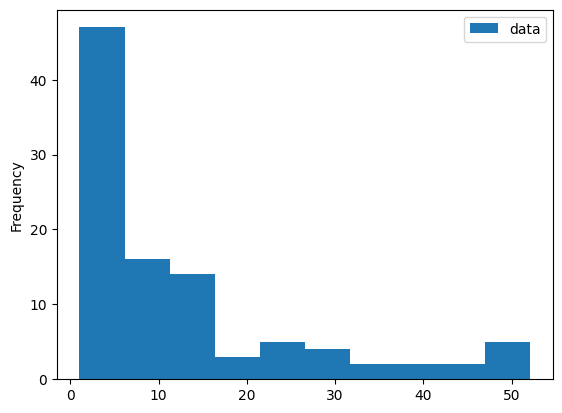

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

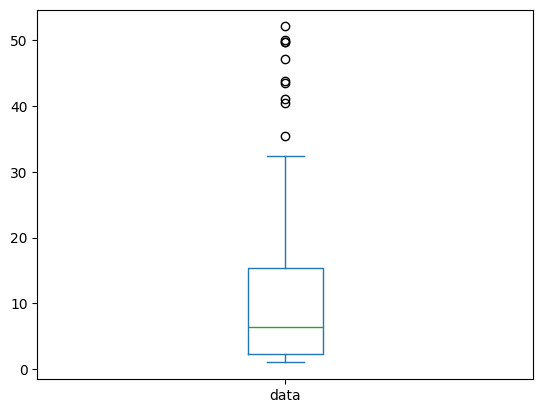

In [4]:
df.plot.box()

Histogram:

Pros:  Shows the distribution of the data across different intervals.Gives a clear picture of how the data is spread out, including peaks and valleys.

Cons:  The interpretation can depend on how the bins are chosen (bin size can influence the appearance).Does not highlight summary statistics like the median, quartiles, or outliers as explicitly as a boxplot.

Boxplot:

Pros:  Provides a concise summary of the data, showing the median, quartiles, and potential outliers.Displays the range and spread of data in an easy-to-interpret manner.

Cons:  Does not show the detailed distribution of the data.Can obscure multimodal distributions and the finer structure of the data.



I would recommend using a boxplot. This is because the boxplot clearly shows the median, the interquartile range, and outliers. I will try to color the boxplot and labels for key statistics


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [9]:
#pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from ucimlrepo import fetch_ucirepo 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
df = bank_marketing.data.features
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [3]:
df = bank_marketing.data.features
df


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


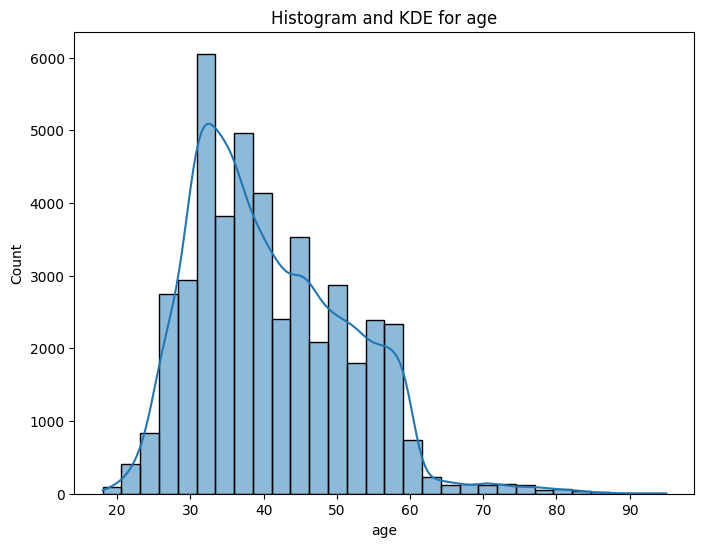

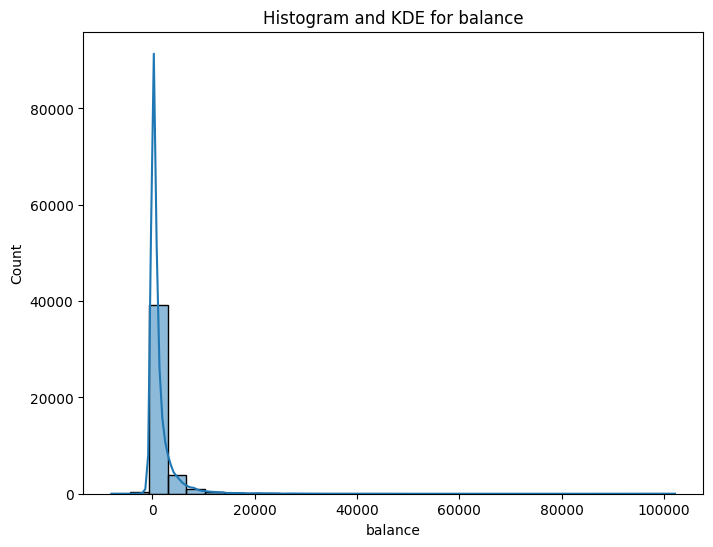

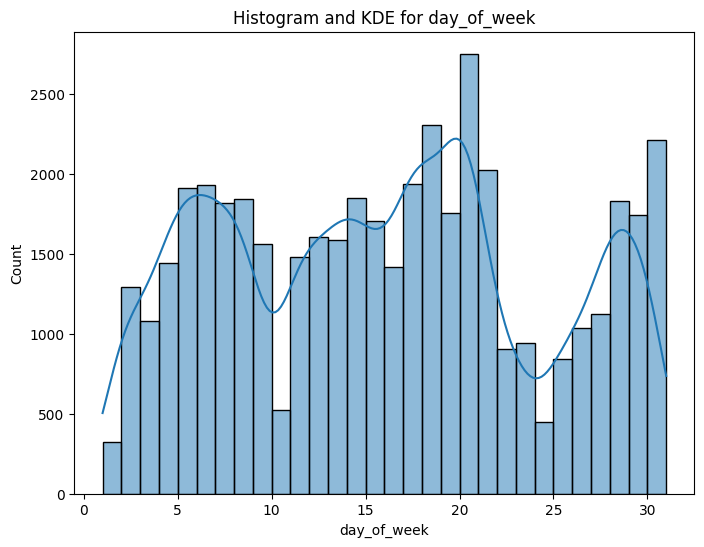

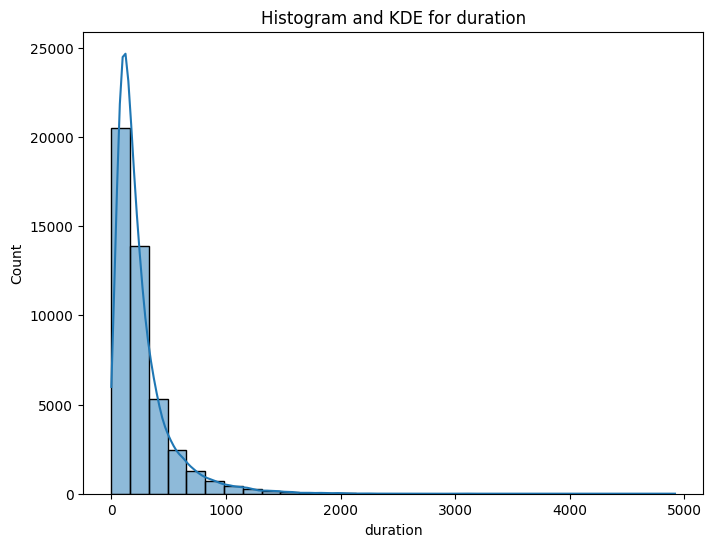

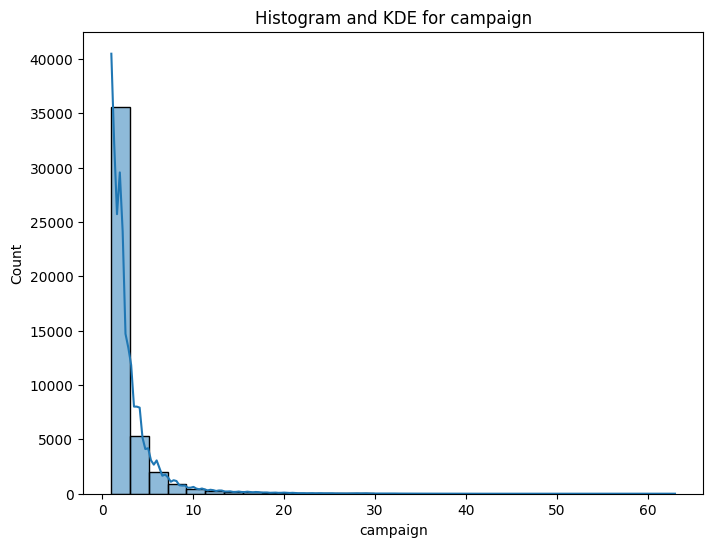

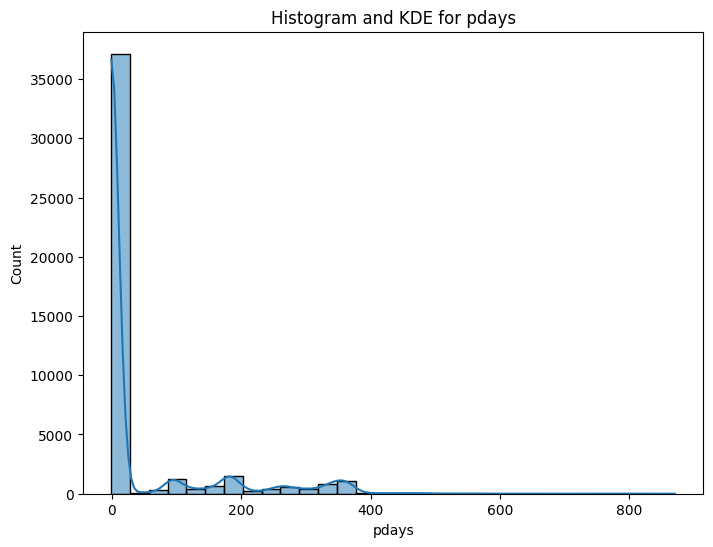

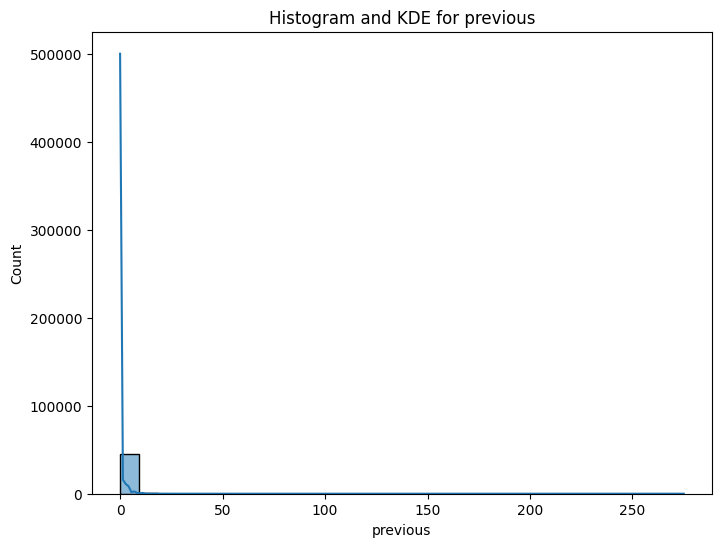

In [4]:
for col in df.select_dtypes(include=np.number).columns:  # Numeric columns
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)  # Histogram + KDE plot
    plt.title(f"Histogram and KDE for {col}")
    plt.show()

The data is useful and clean. Histograms provide a visual sense of the minimum and maximum values for each feature.

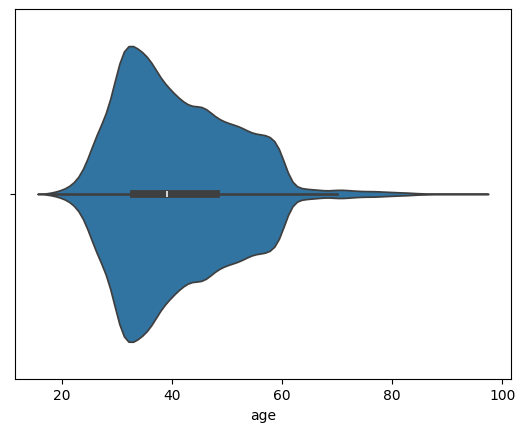

In [8]:
# Violin plot
sns.violinplot(x=df['age'])
plt.show()

Grouped histograms and violin plots  show how distributions differ across different groups by job type

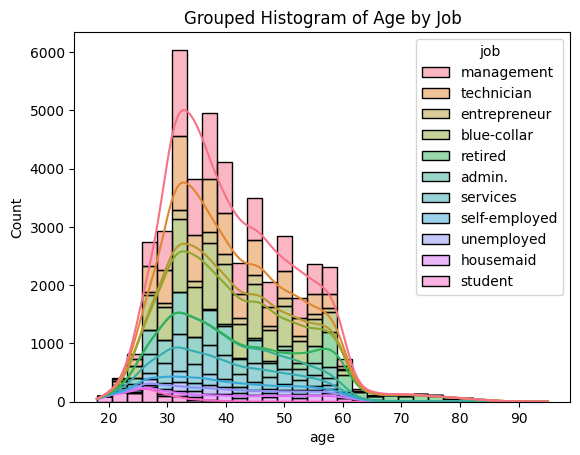

In [5]:
sns.histplot(df, x="age", hue="job", kde=True, bins=30, multiple="stack")
plt.title("Grouped Histogram of Age by Job")
plt.show()

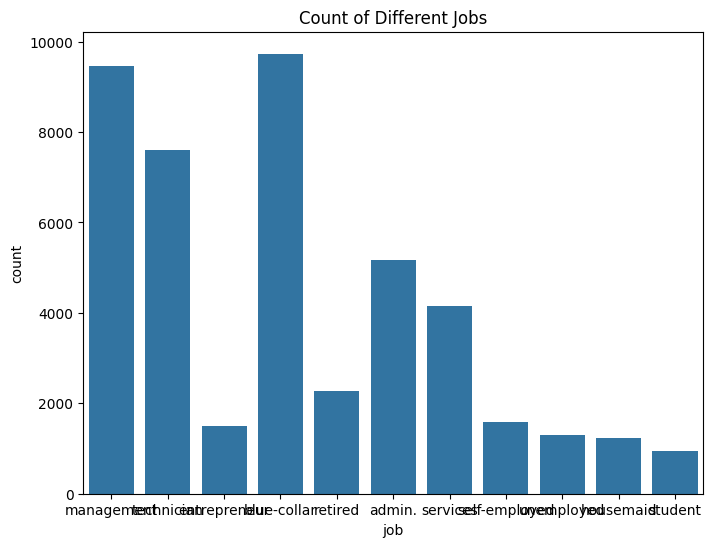

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x="job", data=df)
plt.title("Count of Different Jobs")
plt.show()

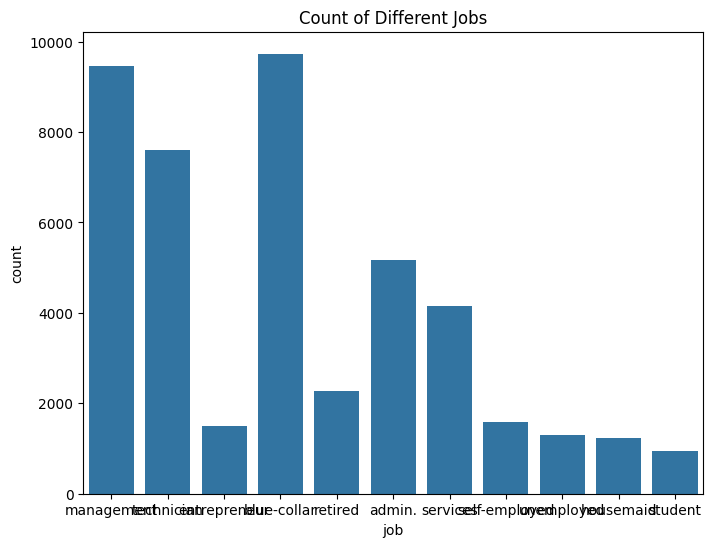

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x="job", data=df)
plt.title("Count of Different Jobs")
plt.show()

The normal distribution is bell-shaped and symmetric around the mean.
Skewed distributions show asymmetry, with one tail being longer than the other.
Bimodal distributions show two distinct peaks.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_7137/2774433815.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Category', data=df, palette='Blues_d')


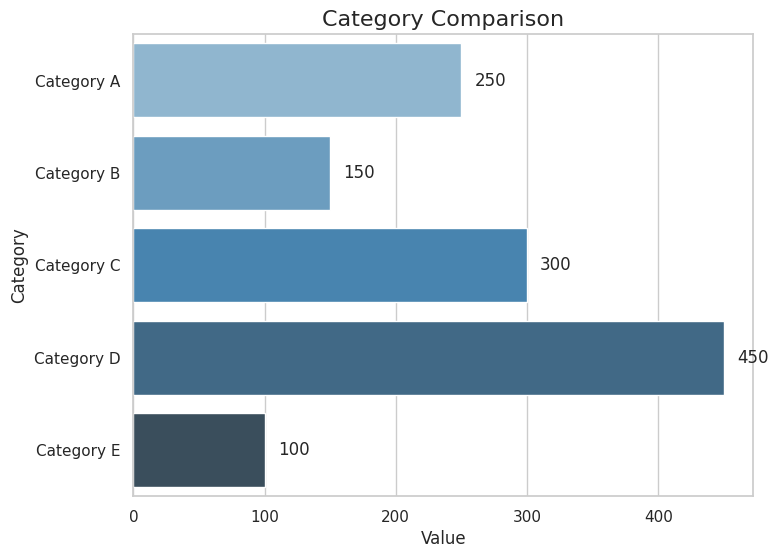

In [3]:
data = {
    'Category': ['Category A', 'Category B', 'Category C', 'Category D', 'Category E'],
    'Value': [250, 150, 300, 450, 100]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style for the graph
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Category', data=df, palette='Blues_d')

# Title and labels
plt.title('Category Comparison', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add the value annotations to the bars
for index, value in enumerate(df['Value']):
    plt.text(value + 10, index, str(value), va='center', fontsize=12)

# Show the plot
plt.show()